In [25]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [16]:
# figure formatting
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['font.size'] = 16

In [2]:
def print_dict(d):
    for key in list(d.keys()):
        print("**" + key + "**")
        print("\t", d[key])

In [3]:
# import data
directory = "./exp/beta"
beta_vals = ["0.01","0.1","1","10","100"]
seeds = ["12345", "23451", "34512", "45123", "51234"]
data = {}

for beta in beta_vals:
    rewards = []
    for seed in seeds:
        filename = "eval_b" + beta + "_" + seed + ".csv"
        eval = np.genfromtxt(os.path.join(directory, filename), delimiter=',')[1:]
        rewards.append(eval[:,3])
    data[beta] = rewards

In [4]:
# calc statistics
avg = {}
std = {}
final = {}

for beta in beta_vals:
    rewards = data[beta]
    avg[beta] = np.mean(rewards, axis=0)
    std[beta] = np.std(rewards, axis=0)
    final[beta] = np.mean(np.array(rewards)[:,-10:], axis=1)

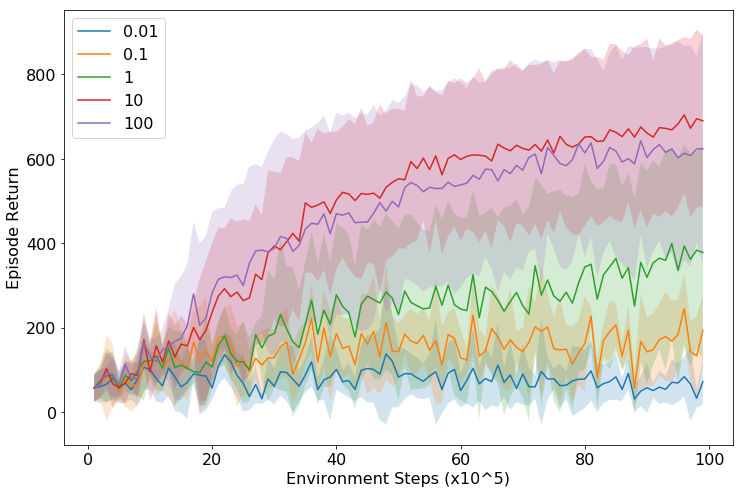

In [17]:
# line plot return v. timestep curves
step = list(range(1, 100, 1))

for beta in beta_vals:
    plt.plot(step, avg[beta], label=beta)
    plt.fill_between(step, avg[beta]+std[beta], avg[beta]-std[beta], alpha=.2)    
    
plt.legend()
plt.xlabel("Environment Steps (x10^5)")
plt.ylabel("Episode Return")

plt.savefig("fig/learning_curves")
plt.show()

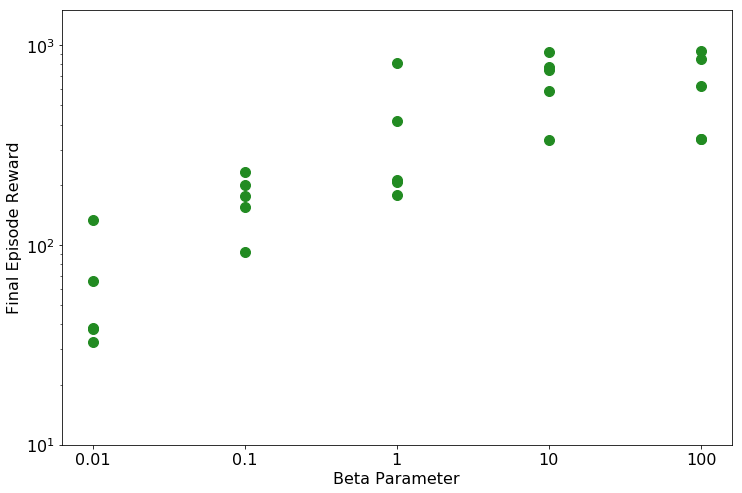

Pearsons correlation: 0.456
P value: 0.0000006


In [31]:
# scatter plot beta v. final vals
keys = final.keys()
x = []
y = []
for key in keys:
    x.extend([key]*len(final[key]))
    y.extend(final[key])
    
plt.scatter(x, y, color="forestgreen", s=100)

plt.yscale('log')
plt.ylim(ymin=10, ymax=1500)
plt.xlabel("Beta Parameter")
plt.ylabel("Final Episode Reward")

plt.savefig("fig/beta_final_reward")
plt.show()

# calculate correlation
corr, _ = stats.pearsonr(np.array(x).astype(float), y)
_, pval = stats.ttest_ind(np.array(x).astype(float), y)
print('Pearsons correlation: %.3f' % corr)
print('P value: %.7f' % pval)